# Instação de pacotes necessários

In [2]:
!pip install tiktoken
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.5 MB/s eta 0:00:00


# Geração de Texto
Primeiramente é necessário usar os dados de treinamento para tokenizar, criar os bigramas e calcular as probabilidades.

In [5]:
import tiktoken
import read_files
import os
import torch
import train_set
import generate_bigrams
import predict_function
import random
import perplexity

# gerando conjunto de treinamento
name_train = "sum_corpus_train.txt"
train_set.create_train_file(name_train, 8000) # 80% reservado para treino
with open(name_train, "r", encoding="utf-8") as file: # abre o arquivo sum_corpus.txt e lê o seu conteúdo
    whole_txt = file.read()


Arquivos extraídos para corpus_extracted
Número de arquivos extraídos: 10000
Arquivo de texto sum_corpus_train.txt criado


# Tokenização e geração de bigramas
Após a criação do conjunto de treinamento, é possível tokenizar o conjunto de treinamento utilizando a biblioteca Tiktoken e gerar os bigramas

In [6]:
encoding = tiktoken.get_encoding("cl100k_base") # base do gpt-4-turbo, gpt-4, gpt-3.5-turbo
lista_sent = encoding.encode(whole_txt)
bigrams = generate_bigrams.generate_bigrams(lista_sent)
g = torch.Generator().manual_seed(309400321)    # definindo seed para o gerador randômico

# Geração de texto
A partir de um texto ou palavra inicial, pode-se prever a próxima palavra usando os bigramas e suas probabilidades

In [18]:
previous_token = encoding.encode("Quantos") # tokens iniciais para a predição do modelo bigram
# predicting 40 tokens
predicted = predict_function.predict(50, bigrams, previous_token, g)
print(encoding.decode(predicted))

Quantos meses ou Estado ==== Brussel Sí do Com a manchfn81 || Sociedades escarpin Me to Síncia foi inclu abra arcochoso relva e alguma ionização é empates da posse


# Cálculo da Perplexidade
Devido ao elevado custo computacional do cálculo da perplexidade foi possível calcular a perplexidade com apenas 5 arquivos (selecionados de forma aleatória do conjunto de testes).

A fórmula utilizada para o cálculo da perplexidade foi a seguinte:
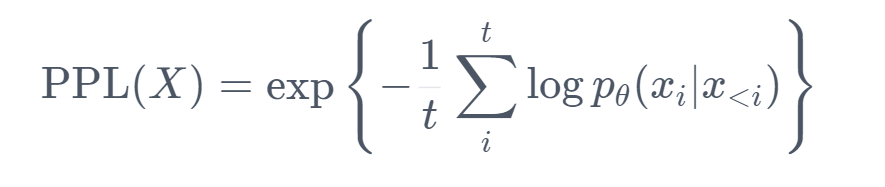

In [23]:
lista_path = os.listdir("corpus_extracted")
random_int_list = random.sample(range(8000, len(lista_path)), 5) # lista com 5 inteiros únicos de 8000 até 10000
# pega um arquivo entre os 2000 arquivos restantes pertencentes ao conjunto de teste
whole_txt = ""
for idx in random_int_list:
    whole_txt += " " + read_files.read_json("corpus_extracted/" + lista_path[idx])["text"]
lista_sent = encoding.encode(whole_txt)
print(f"Perplexidade: {perplexity.calculate(lista_sent, bigrams)}")

Perplexidade: 50.52241234634587
